# Sparse Recovery
\begin{equation}
\begin{pmatrix}
0 & -1 & 0 & -1 & 1 & 0\\
-2&  1 & 0 & 2  & 0 & -1 \\
0 & 1 & 0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 & -1 & 2\\
\end{pmatrix}
\begin{pmatrix}
x_1 \\
x_2  \\
x_3 \\
x_4 \\
x_5 \\
x_6 \\
\end{pmatrix}=
\begin{pmatrix}
2 \\
1 \\
1 \\
-3 \\
\end{pmatrix}
\end{equation}

* Please compute $[x_1, x_2, ..., x_6]$ with minimum $L1$-norm objectvie loss.

\begin{equation}
  \min f_1(x)=|x_1|+|x_2|+...|x_n|=norm_1(x) \\
  s.t. \ \ Ax = b
\end{equation}

In [1]:
import numpy as np
# the mathematical calculating package
import cvxpy as cp
# the convex programming package

A = [[0,-1,0,-1,1,0],
   [-2,1,0,2,0,-1],
   [0,1,0,0,0,1],
   [0,0,1,0,-1,2]]
#  [0,0,0,0,-0,0]]
# b = np.expand_dims(np.array(b),1)
b = [[2,1,1,-3]]
A = np.array(A) # 4x6:
b = np.array(b).T # 4x1

# define variable
x = cp.Variable((6,1))

# define optimization problems
obj = cp.sum(cp.abs(x))
# obj = cp.norm(x,1) 

constraints=[cp.matmul(A,x)==b] # f1 Constraints
prob = cp.Problem(cp.Minimize(obj),constraints)
loss = prob.solve()

print(f"Loss is {loss:.4f}")
# print(x.value)
print("The optimal solution x:")
print(np.around(x.value,decimals=4))

Loss is 4.0000
The optimal solution x:
[[-0.]
 [ 1.]
 [-0.]
 [-0.]
 [ 3.]
 [ 0.]]


# Background Removal from Surveillance Video

<!-- fi = x+yi 
[F1,F2] = [I,I|I,o; o,I][x;y;y2] -->


The size of image is (130, 160) with 20800 pixels


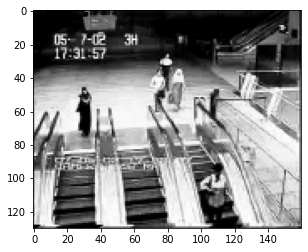

In [2]:
import numpy as np
import cv2 # read image
import cvxpy as cp
from cvxpy import *
# import sdpt3glue.solve as slv
import matplotlib.pyplot as plt


# Reading image files from /content/Figure1.png
im1 = cv2.imread('/content/figure1.png',cv2.IMREAD_GRAYSCALE)
im2 = cv2.imread('/content/figure2.png',cv2.IMREAD_GRAYSCALE)
im3 = cv2.imread('/content/figure3.png',cv2.IMREAD_GRAYSCALE)


# compute the number of the pixels
f_size = im1.shape
size_a = f_size[0]
size_b = f_size[1]
n = size_a*size_b
print(f"The size of image is {im1.shape} with {n} pixels")

#####  Average image for background extraction 

plt.figure()
plt.imshow(im1, cmap='gray')
# plt.figure()
# plt.imshow(((im1+im2+im3)/3.), cmap='gray')
# plt.figure()
# plt.imshow((im1 - (im1+im2+im3)/3.), cmap='gray')

* We denote the i-th image as $f^i$, the background as $x$ and the foreground as $y^i$
* $y$ should be sparse vector. Minimize the $L1$ norm of $y$.
\begin{equation}
  \min \sum_{i}\sum_{j}|y^i_j| = \sum_{i}norm_1(y^i) \\
  s.t. \ \ f^i = y^i + x
\end{equation}
* It can also be formulated as
\begin{equation}
  \min \sum_{i}norm_1(f^i-x) \\
\end{equation}

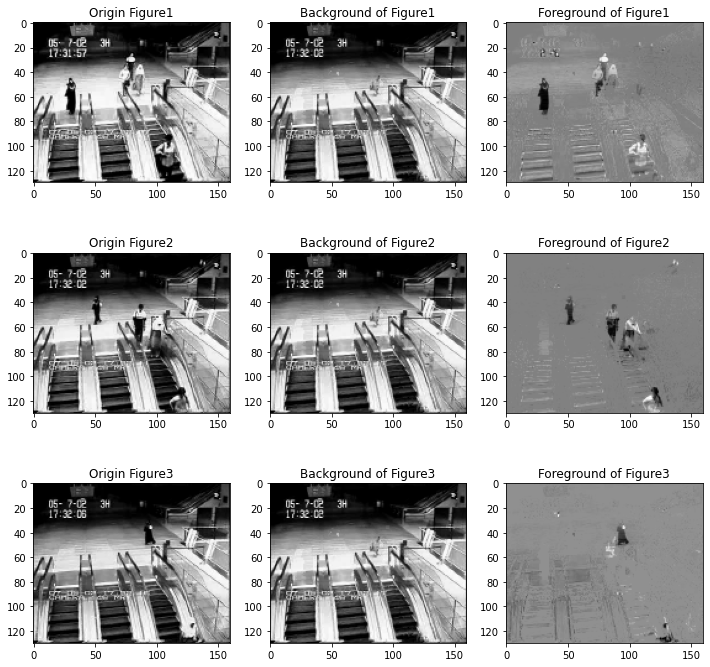

In [3]:
######################################################  Sparse constrained optimization ##########################################
# Transform the image matrix to a column vector
# n = the number of pixels
f1 = im1.reshape(n,-1)
f2 = im2.reshape(n,-1)
f3 = im3.reshape(n,-1)

# Define the background variable with the shape n
x = cp.Variable((n,1))

# Optimization problem
obj = cp.norm(f1-x,1) + cp.norm(f2-x,1) + cp.norm(f3-x,1) # This formulation use f1=y1+x
prob = cp.Problem(cp.Minimize(obj))
prob.solve()

# Show the results
fig, axs = plt.subplots(3,3, figsize=(12,12)) # the arrangement of the plot

axs[0,0].set_title("Origin Figure1")
axs[0,0].imshow((f1).reshape(size_a, size_b), cmap='gray')
axs[0,1].set_title("Background of Figure1")
axs[0,1].imshow((x.value).reshape(size_a, size_b), cmap='gray')
axs[0,2].set_title("Foreground of Figure1")
axs[0,2].imshow((f1 - x.value).reshape(size_a, size_b), cmap='gray')

axs[1,0].set_title("Origin Figure2")
axs[1,0].imshow((f2).reshape(size_a, size_b), cmap='gray')
axs[1,1].set_title("Background of Figure2")
axs[1,1].imshow((x.value).reshape(size_a, size_b), cmap='gray')
axs[1,2].set_title("Foreground of Figure2")
axs[1,2].imshow((f2 - x.value).reshape(size_a, size_b), cmap='gray')


axs[2,0].set_title("Origin Figure3")
axs[2,0].imshow((f3).reshape(size_a, size_b), cmap='gray')
axs[2,1].set_title("Background of Figure3")
axs[2,1].imshow((x.value).reshape(size_a, size_b), cmap='gray')
axs[2,2].set_title("Foreground of Figure3")
axs[2,2].imshow((f3 - x.value).reshape(size_a, size_b), cmap='gray')


# Training a Simple Classifier

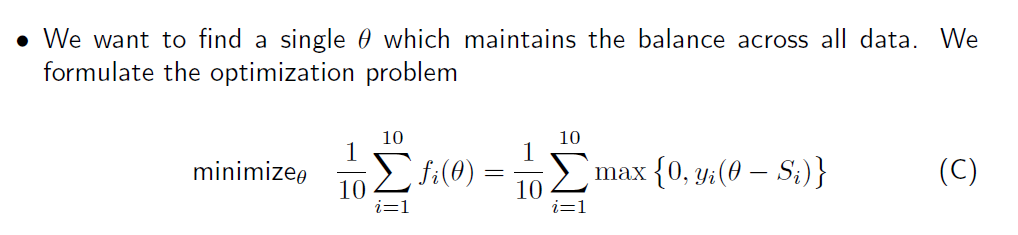

In [4]:
import numpy as np
import cvxpy as cp

# Midterm scores of students
s = np.array([51,90,61,80,99,10,54,33,45,13])
# Referecne labels to denote whether students pass final exams or not 
# 1 refers to "pass", -1 "failed"
y = np.array([1,1,1,1,1,-1,-1,-1,-1,-1])
N = len(y) # number of students

theta = cp.Variable((1)) # threshold

obj = 1/N * cp.sum(cp.maximum(0,cp.multiply(y, theta-s)))

prob = cp.Problem(cp.Minimize(obj))
loss = prob.solve()

print(f"theta is {theta.value}")
print(f"loss is {loss}\n")

phi = 0.000001 # additional loss for theta
obj = 1/N * cp.sum(cp.maximum(0,cp.multiply(y, theta-s))) + phi*theta

prob = cp.Problem(cp.Minimize(obj))
loss = prob.solve()

print(f"theta is {theta.value} when phi is {phi}") # 51<\theta<54 is all optimal, not unique
print(f"loss is {loss}")


theta is [52.67364897]
loss is 0.30000000000000004

theta is [51.00001506] when phi is 1e-06
loss is 0.30005100001505547


# Logistic Regression
* Logistic cost function (logistic regression)
\begin{equation}
 \min_{W,b} \frac{1}{N}\sum_{i=1}^{N}\log(1+exp(-y_i*(w^Tx_i-b))) + \rho(b^2+norm_2(w)^2)
\end{equation}
* ${norm_2}(w)=\sqrt {\sum_{i}w_{i}^2}$.
* $w=[w_1,w_2]$



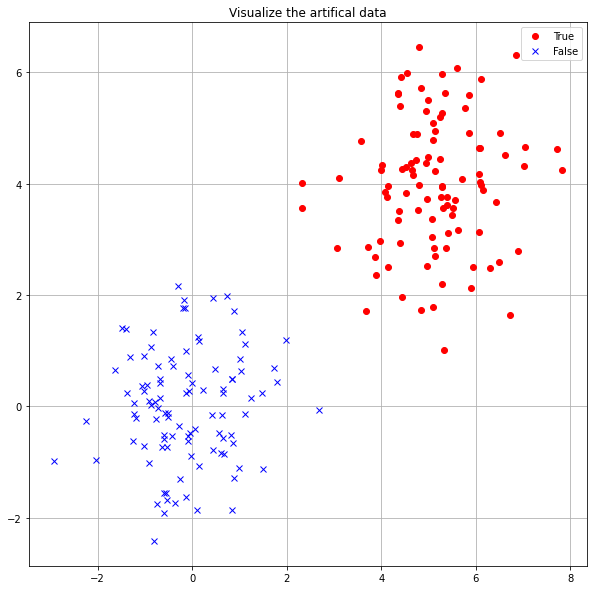

In [8]:
import numpy as np
import cvxpy as cp

# Generate and visualize data
# 2D example
np.random.seed(3) 

n = 2 # dimension of the feature x i.e. GDP and Life Expectancy
m = 100 # number of training samples

# randn - Gaussian distribution
# false samples with mean point [0,0]
X_false = np.random.randn(m,n)+np.array([0,0])
Y_false = -np.ones(m) # lable false

# true samples with mean point [5,4]
X_true = np.random.randn(m,n)+ np.array([5,4])
Y_true = np.ones(m) # label true

# ploting package
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
plt.grid(True)
plt.plot(X_true[:,0], X_true[:,1], 'ro', label='True')
plt.plot(X_false[:,0], X_false[:,1], 'bx', label='False' )
plt.legend(loc='upper right')
# plt.xlabel('GDP')
# plt.ylabel('Life experience')
plt.title('Visualize the artifical data')
plt.show()


# Logistic Regression
Aim: Find a line $w^Tx = b$ to seperate two subsets.
* Logistic cost function (logistic regression)
\begin{equation}
 \min_{W,b} \frac{1}{N}\sum_{i=1}^{N}\log(1+exp(-y_i*(w^Tx_i-b))) + \rho(b^2+norm_2(w)^2)
\end{equation}
* $L2$ norm : ${norm_2}(w)=\sqrt {\sum_{i}w_{i}^2}$.
* $w=[w_1,w_2]$

Shape of the data: | Features: (200, 2) | Lables: (200, 1)
Logistic Regression Optimal Weight:[3.05621741 2.80467486], bias:12.4038515492572


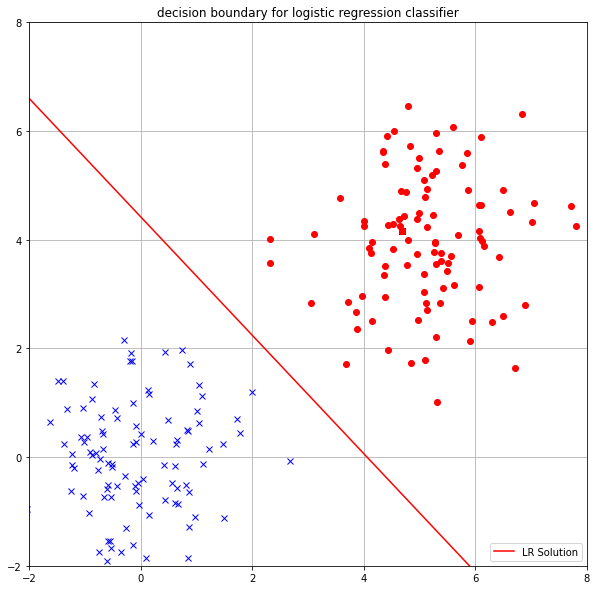

In [11]:
X = np.concatenate((X_true,X_false), axis=0)
Y = np.concatenate((Y_true,Y_false), axis=0)[:, None]
print("Shape of the data:", "| Features:",X.shape, "| Lables:",Y.shape) # visualize the shape of the data
####################################### Solution 1: Logistic regression ########################################
# n = 2
w_lr = cp.Variable((n,1))
b_lr = cp.Variable()

obj_lr = 0
N=m*n # 100*2
for i in range(N):
    obj_lr += cp.logistic(-Y[i]@(w_lr.T@X[i]-b_lr))
phi=0.00001 # a small value used for last term, which is added to prevent numerical issues
prob_lr = cp.Problem(cp.Minimize(1.0/N *obj_lr + phi*(cp.norm(w_lr)**2+cp.norm(b_lr)**2)))
prob_lr.solve()

# Show the results
print("Logistic Regression Optimal Weight:{}, bias:{}".format(w_lr.value[:,0],b_lr.value))
xp = np.linspace((X[:,0]).min(), (X[:,0]).max(), 100)
yp_lr = - (w_lr.value[0]*xp - b_lr.value)/w_lr.value[1]

idx0 = np.where(Y==-1) 
idx1 = np.where(Y==1)
plt.figure(figsize=(10,10))
plt.xlim(xmin=-2,xmax=8)
plt.ylim(-2,8)
plt.grid(True)
plt.plot(X[idx0, 0], X[idx0, 1], 'bx' )
plt.plot(X[idx1, 0], X[idx1, 1], 'ro')


plt.plot(xp, yp_lr, '-r', label="LR Solution")
plt.title('decision boundary for logistic regression classifier')
plt.legend(loc='lower right')
plt.show()

* Minimum mean square error function (MMSE)

\begin{equation}
  \min_{w,b} \frac{1}{N}\sum_{i=1}^{N}(y-f(x))^2 + \rho(b^2+{norm_2}(w)^2) \\
  s.t. \quad f(x) = w^Tx-b
\end{equation}

Logistic Regression Optimal Weight:[3.05621741 2.80467486], bias:12.4038515492572
Mean Square Error Weight:[0.24176454 0.13613162], bias:0.8742725895172061


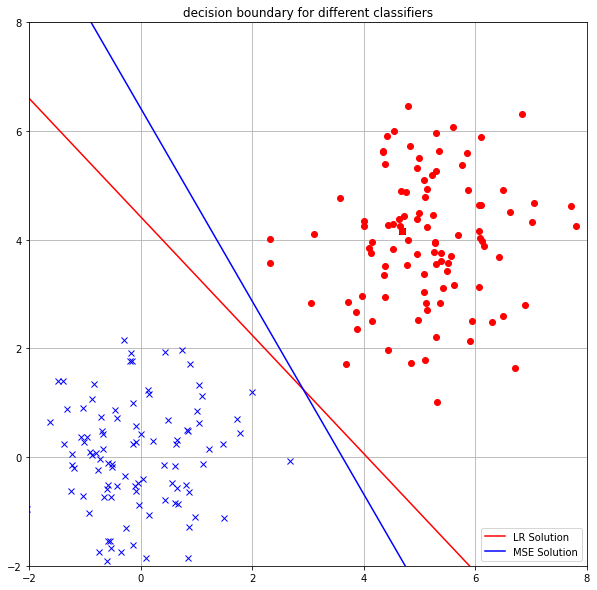

In [15]:
######################################## Solution 2: Mean square Error   ########################################
w_mse = cp.Variable((n,1))
b_mse = cp.Variable()

obj_mse = 0
for i in range(200):
    obj_mse += (Y[i]- (w_mse.T @ X[i] - b_mse )) ** 2
prob_mse = cp.Problem(1.0/200 * cp.Minimize(obj_mse + 0.001*(cp.norm(w_mse)**2+cp.norm(b_mse)**2)))
prob_mse.solve()


# Show the results
print("Logistic Regression Optimal Weight:{}, bias:{}".format(w_lr.value[:,0],b_lr.value))
print("Mean Square Error Weight:{}, bias:{}".format(w_mse.value[:,0],b_mse.value))

xp = np.linspace((X[:,0]).min(), (X[:,0]).max(), 100)
yp_lr = - (w_lr.value[0]*xp - b_lr.value)/w_lr.value[1]
yp_mse = - (w_mse.value[0]*xp - b_mse.value)/w_mse.value[1]

idx0 = np.where(Y==-1) 
idx1 = np.where(Y==1)
plt.figure(figsize=(10,10))
plt.xlim(xmin=-2,xmax=8)
plt.ylim(-2,8)
plt.plot(X[idx0, 0], X[idx0, 1], 'bx' )
plt.plot(X[idx1, 0], X[idx1, 1], 'ro')


plt.plot(xp, yp_lr, '-r', label="LR Solution")
plt.plot(xp, yp_mse, '-b', label="MSE Solution")
plt.title('decision boundary for different classifiers')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



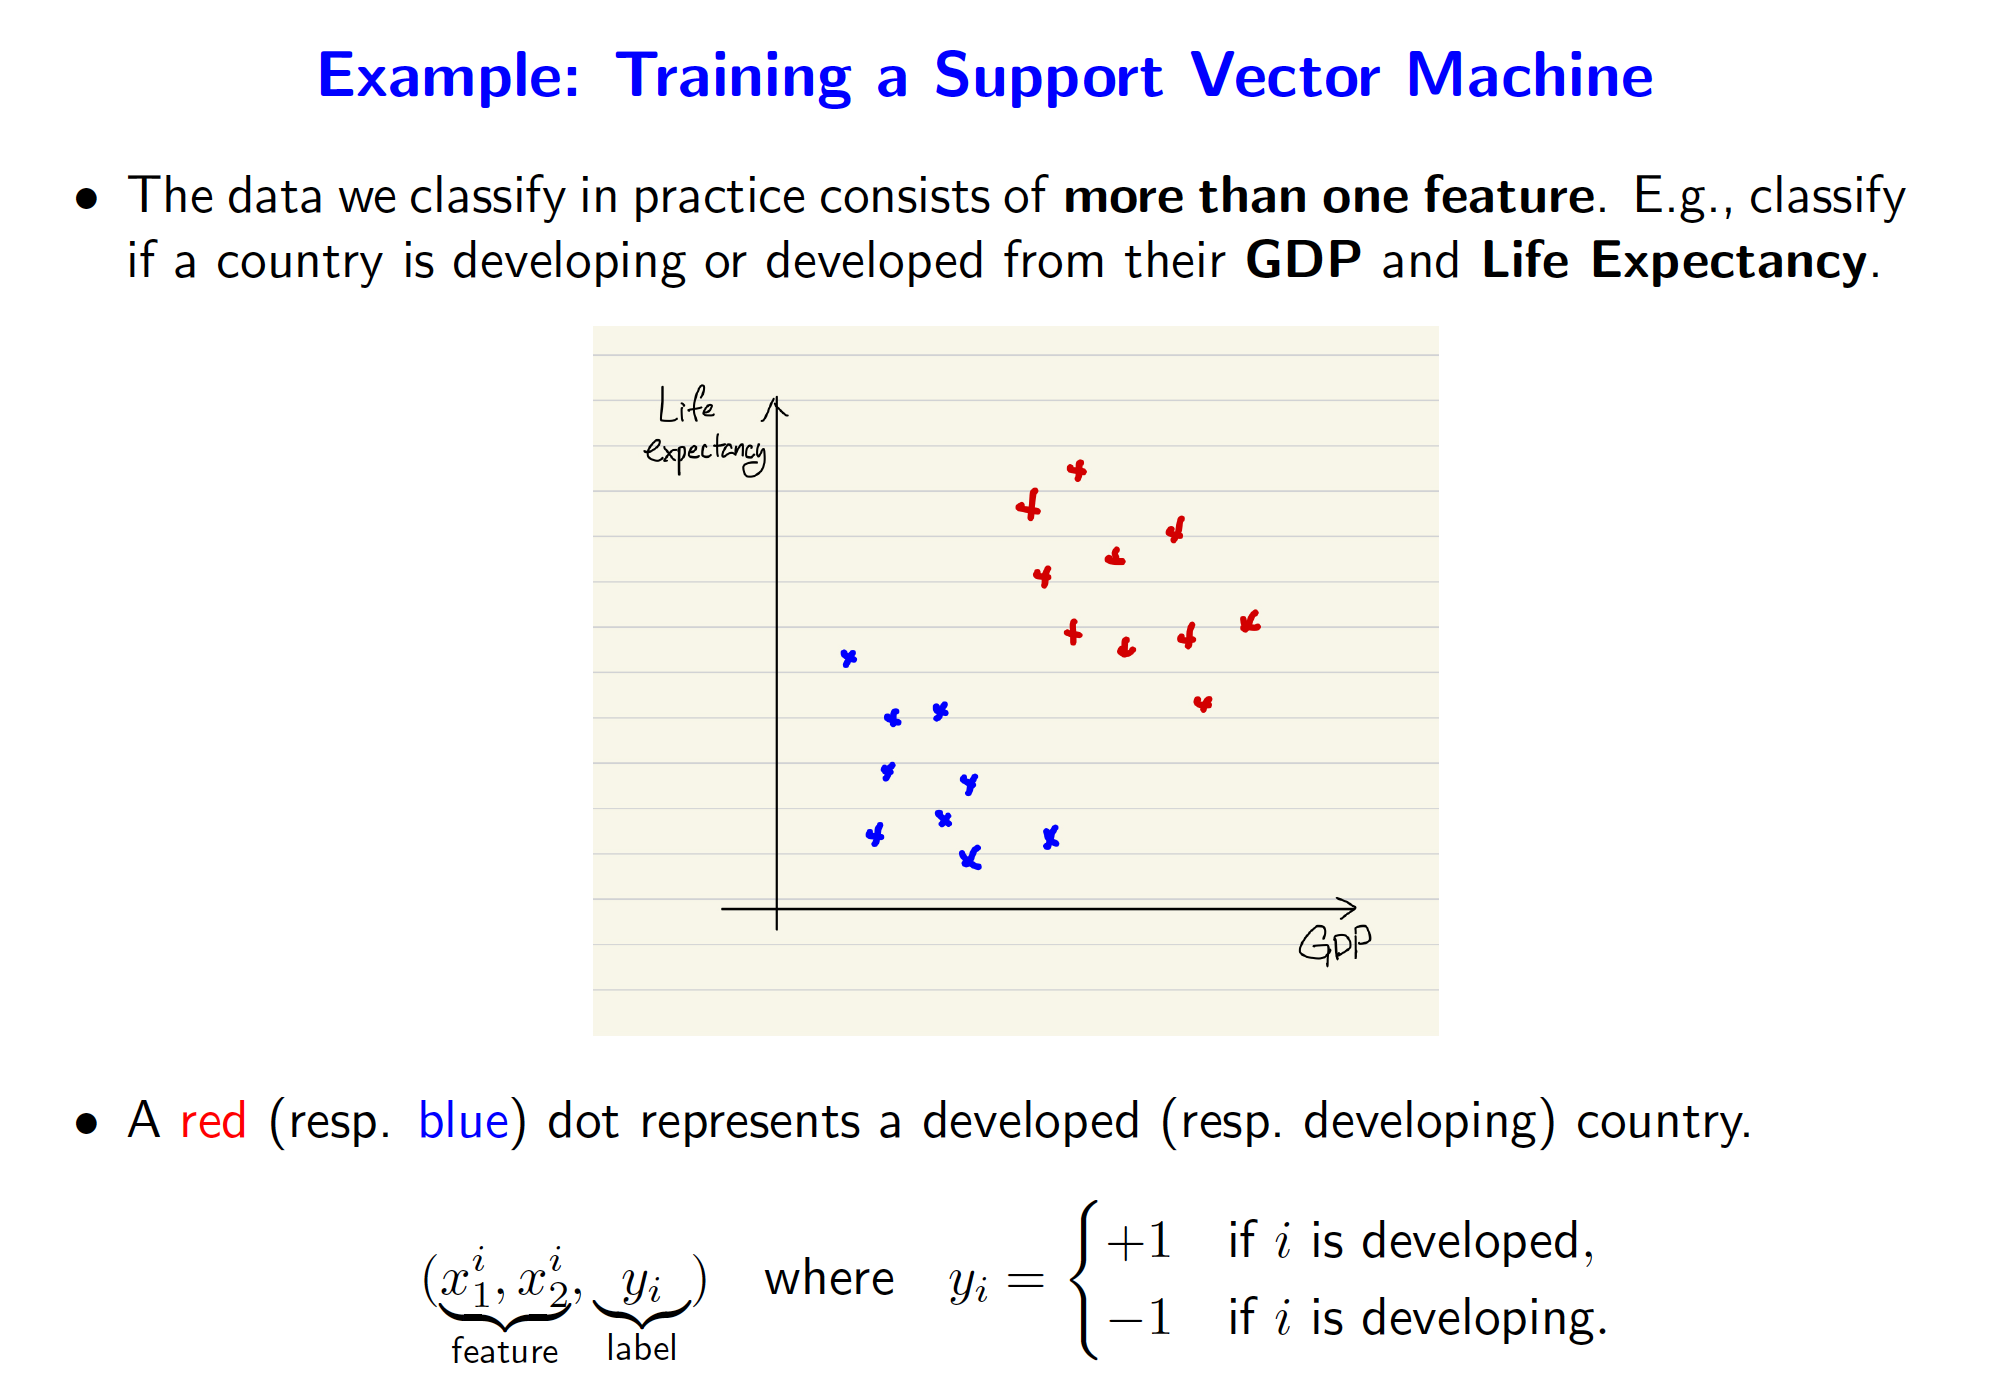


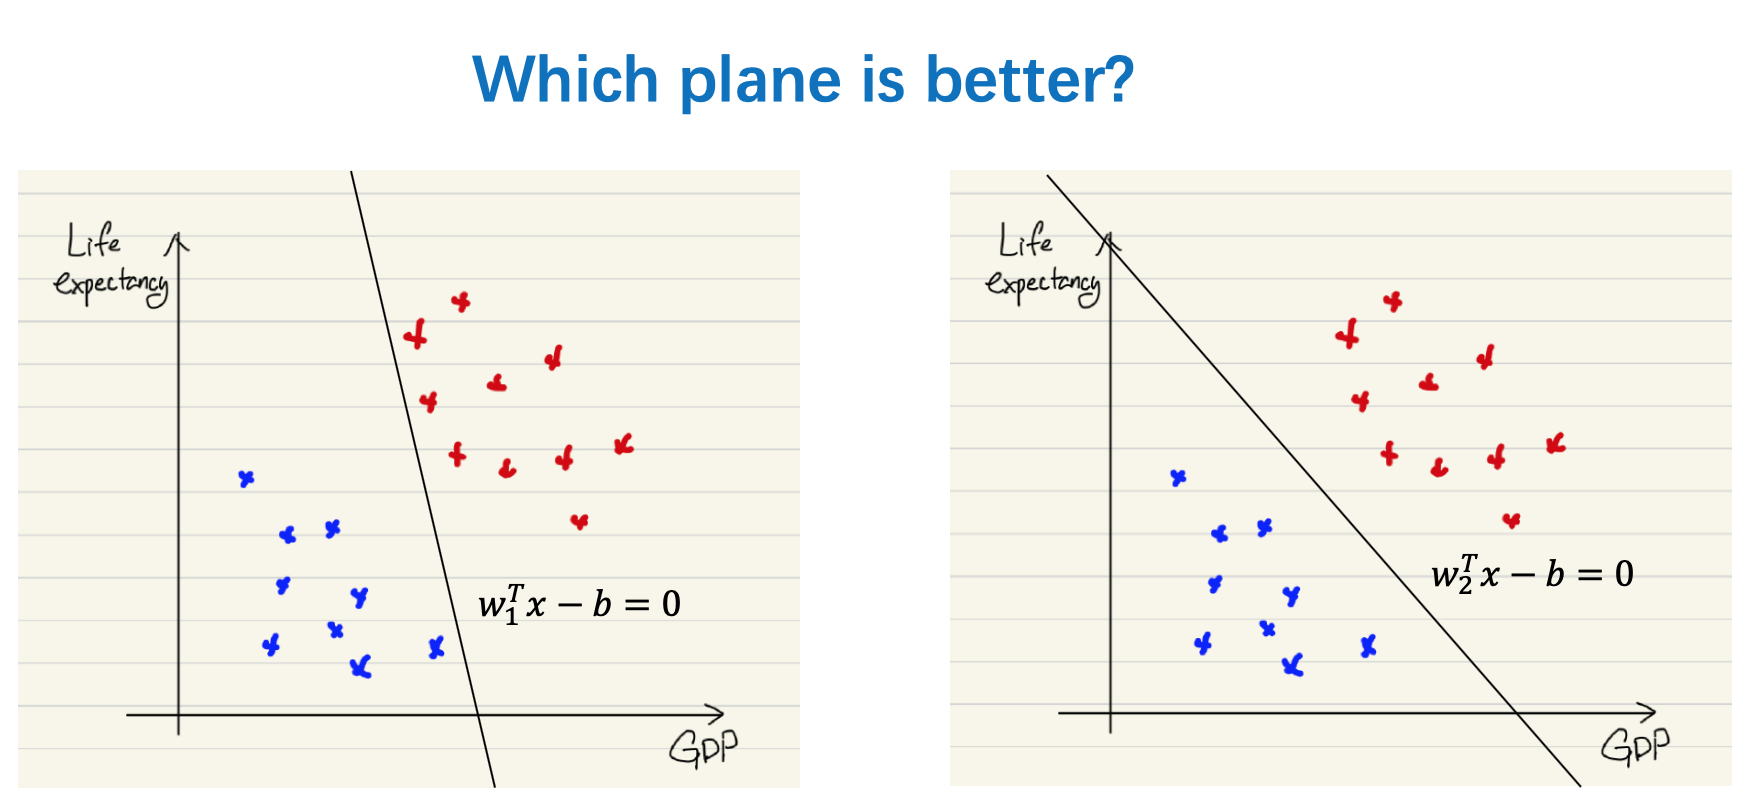
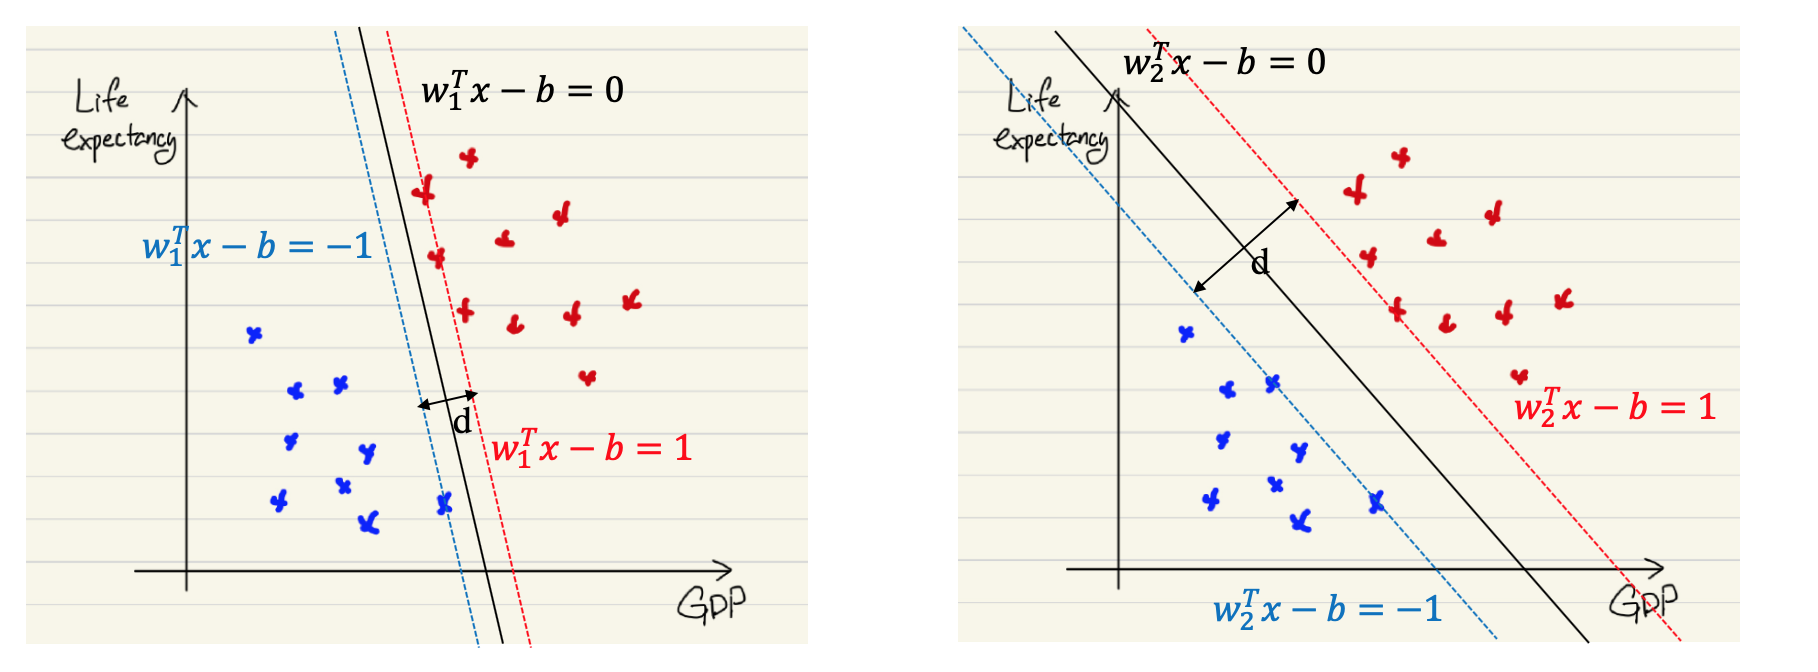

## Lemma:
Given two parallel lines
\begin{equation}
 w^T x + c_1 = 0 \\
 w^T x + c_2 = 0 \\
\end{equation}

Their distance can be computed as
\begin{equation}
d = \frac{|c_2-c_1|}{\sqrt{w^Tw}}
\end{equation}

# SVM classifier

* $w=[w_1, w_2]$
* Objective: We want to maximize the value of $d$
\begin{equation}
 \max_{w,b} d
\end{equation}

\begin{equation}
 where: d = \frac{2}{\sqrt{w^Tw}}=\frac{2}{\sqrt{w_1^2+w_2^2}} = \frac{2}{norm_2(w)}
\end{equation}

Proofs:

* Given the line $w^Tx-b=0$ to separate two subsets, we require that the true samples $x$ above the line should have ${w}^Tx-{b} > 0$ and false samples $x$ below the line have ${w}^Tx-{b} < 0$.
* We first select the **nearest true** point $x_{t}$ from the true subset with label $y=1$.
* Similarly, select the **nearest false** point $x_{f}$ from the false subset with label $y=-1$.
* Then, we construct two parallel lines across these two points respectively, such that:
\begin{equation}
 w^T x_t - b = c_{t}, (c_t > 0) \\
 w^T x_f - b = c_{f}, (c_f < 0) \\
\end{equation}
Rescale both sides of the equations with $min(|c_t|,|c_f|)$, we can botain 
\begin{equation}
 \tilde{w}^T x_t - \tilde{b} \geq 1 \\
 \tilde{w}^T x_f - \tilde{b} \leq -1 \\
\end{equation}
We want to maximize their distance:
$$d = \frac{|1-\tilde{b}-(-1-\tilde{b})|}{\sqrt{\tilde{w}^T\tilde{w}}}=\frac{2}{\sqrt{\tilde{w}^T\tilde{w}}}$$
* Meanwhile, to separate two subsets, we require that the true samples $x$ above the line should have $\tilde{w}^Tx-\tilde{b} \geq 1$ and false samples $x$ below the line have $\tilde{w}^Tx-\tilde{b} \leq -1$.
* The constraints can be expressed as:
\begin{equation}
 y_i(\tilde{w}^T x_i - \tilde{b}) \geq1, i=1, 2, ..., N
\end{equation}


* We can refomulate the objective to minimize the reciprocal of the distance:
\begin{equation}
 \max_{w,b}\frac{2}{norm_2(w)} \to \min_{w,b} \frac{norm_2(w)}{2} \\
 s.t. \quad y_i(w^T x_i - b) \geq1, i=1, 2, ..., N
\end{equation} 

## SVM optimizer

SVM: Optimal Weight:[0.96664833 0.7058087 ], bias:3.7656528048880067


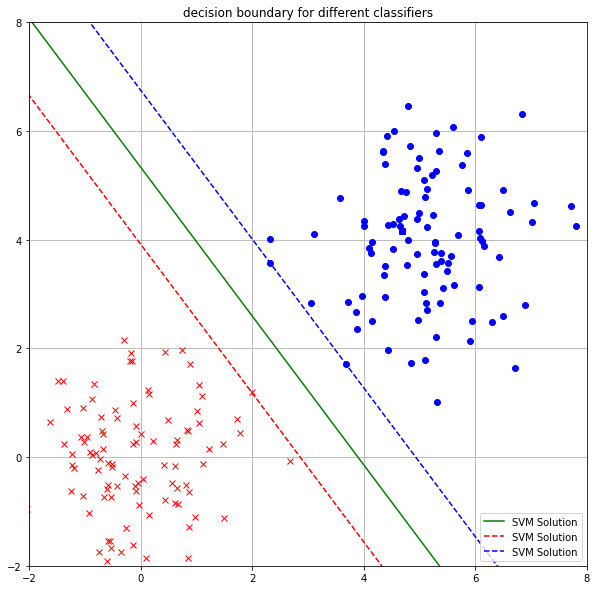

In [17]:
########################################   Solution 3: SVM optimizer    ########################################
w_svm = cp.Variable((n,1))
b_svm = cp.Variable()

obj_svm = cp.Minimize(1/2*cp.norm(w_svm,2))
constrains=[cp.multiply(Y,(X@w_svm-b_svm))>=1] # using a matrix form satifiy the constraints simutanously
prob_svm = cp.Problem(obj_svm,constrains)
prob_svm.solve()

print("SVM: Optimal Weight:{}, bias:{}".format(w_svm.value[:,0],b_svm.value))
xp = np.linspace(X[:,0].min(), X[:,0].max(), 100)


yp_svm = - (w_svm.value[0]*xp - b_svm.value)/w_svm.value[1]
yp_svm_f = - (w_svm.value[0]*xp - b_svm.value -1)/w_svm.value[1]
yp_svm_t = - (w_svm.value[0]*xp - b_svm.value + 1)/w_svm.value[1]


idx0 = np.where(Y==-1) 
idx1 = np.where(Y==1)
plt.figure(figsize=(10,10))
plt.xlim(xmin=-2,xmax=8)
plt.ylim(-2,8)
plt.plot(X[idx0, 0], X[idx0, 1], 'rx' )
plt.plot(X[idx1, 0], X[idx1, 1], 'bo')

plt.plot(xp, yp_svm, '-g', label="SVM Solution")
plt.plot(xp, yp_svm_t, '--r', label="SVM Solution")
plt.plot(xp, yp_svm_f, '--b', label="SVM Solution")
plt.title('decision boundary for different classifiers')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

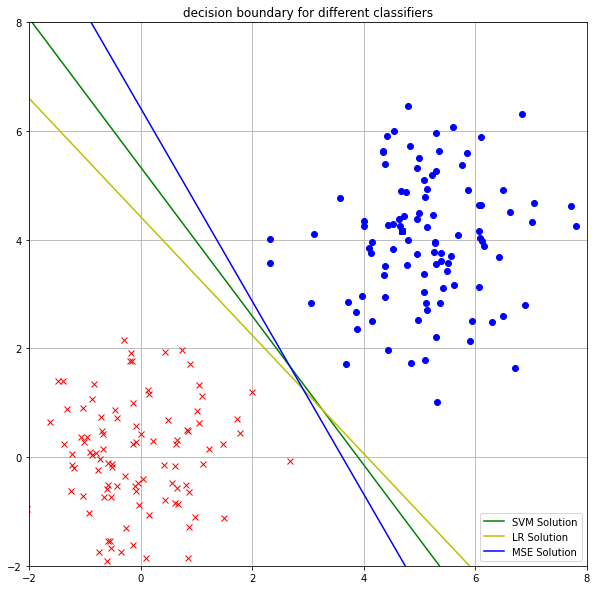

In [ ]:
plt.figure(figsize=(10,10))
plt.xlim(xmin=-2,xmax=8)
plt.ylim(-2,8)
plt.plot(X[idx0, 0], X[idx0, 1], 'rx' )
plt.plot(X[idx1, 0], X[idx1, 1], 'bo')

plt.plot(xp, yp_svm, '-g', label="SVM Solution")
# plt.plot(xp, yp_svm_t, '--r', label="SVM Solution")
# plt.plot(xp, yp_svm_f, '--b', label="SVM Solution")

plt.plot(xp, yp_lr, '-y', label="LR Solution")
plt.plot(xp, yp_mse, '-b', label="MSE Solution")
plt.title('decision boundary for different classifiers')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()